<a href="https://colab.research.google.com/github/123jyoti614/BLR_house_price_prediction/blob/main/bengaluru_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [4]:
df.head()
df.shape

(13320, 9)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [8]:
df['society'].value_counts()

,count
society,
GrrvaGr,80
PrarePa,76
Sryalan,59
Prtates,59
GMown E,56
...,...
SLtalry,1
Rencyes,1
DiaveEn,1


In [9]:
df2 = df.drop(['availability','society'],axis = 1)

In [10]:
df2.isnull().sum()

,0
area_type,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [11]:
df2.balcony=df2.balcony.fillna(df2.balcony.median())

In [12]:
df2.isnull().sum()

,0
area_type,0
location,1
size,16
total_sqft,0
bath,73
balcony,0
price,0


In [13]:
df2.bath=df2.bath.fillna(df2.bath.median())

In [14]:
df2.isnull().sum()

,0
area_type,0
location,1
size,16
total_sqft,0
bath,0
balcony,0
price,0


In [15]:
df3=df2.dropna()

In [16]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
df3.shape

(13303, 7)

In [18]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-19-bc724604c577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [20]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [21]:
df3.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0


In [22]:
df3['location'].unique()  #to check the unique vlue

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
df3.groupby(['location']).count()

,area_type,size,total_sqft,bath,balcony,price,BHK
location,,,,,,,
Anekal,1,1,1,1,1,1,1
Banaswadi,1,1,1,1,1,1,1
Basavangudi,1,1,1,1,1,1,1
Bhoganhalli,1,1,1,1,1,1,1
Devarabeesana Halli,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
t.c palya,1,1,1,1,1,1,1
tc.palya,4,4,4,4,4,4,4
vinayakanagar,1,1,1,1,1,1,1


In [24]:
df3=df3.drop(['size'],axis=1)

<Axes: xlabel='BHK'>

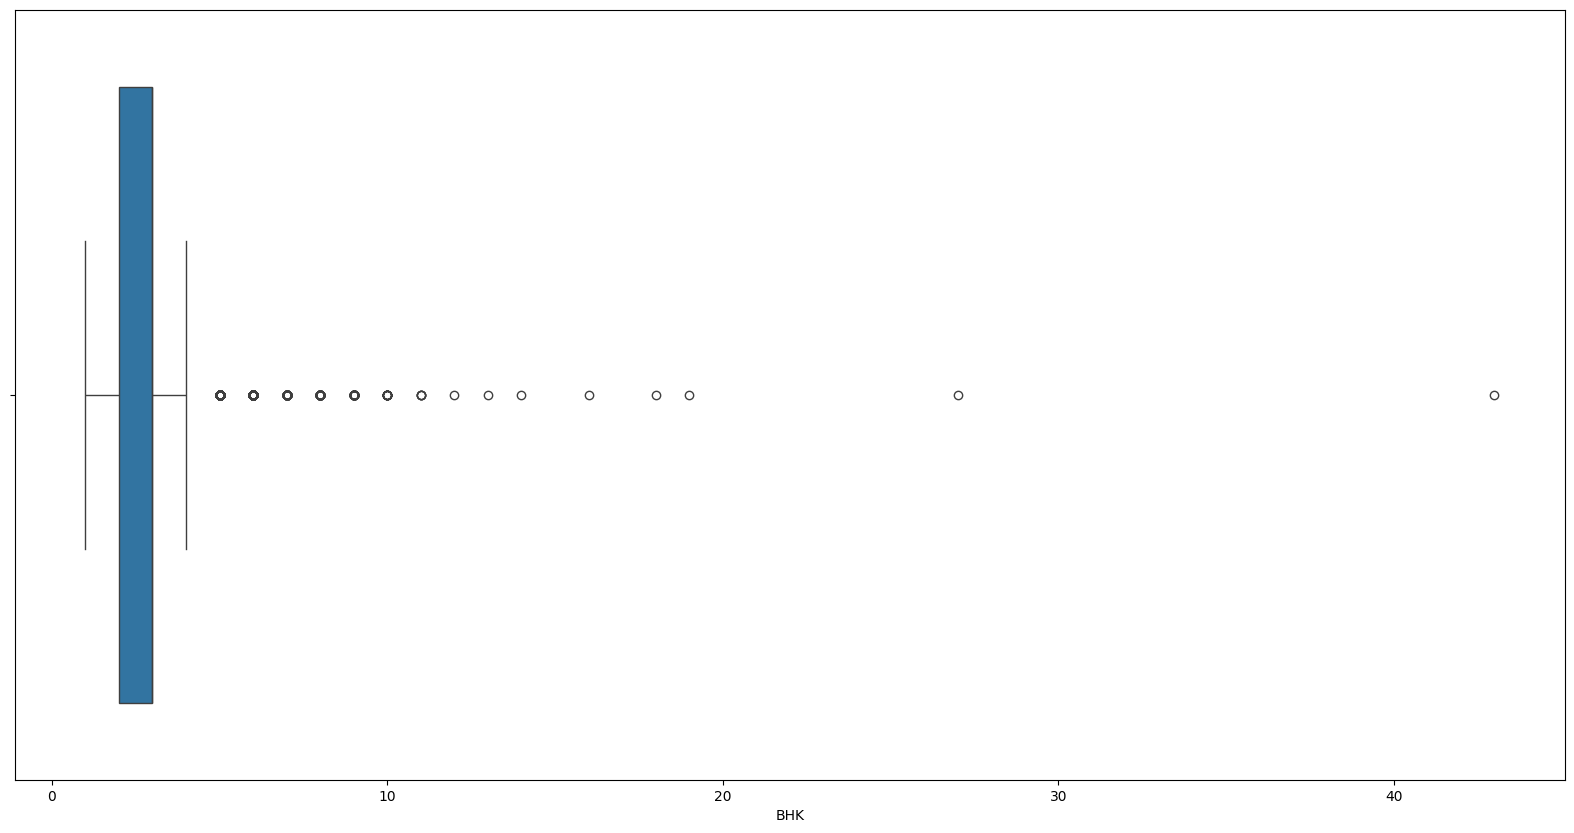

In [25]:
import seaborn as sns
sns.boxplot(x=df3['BHK'],data=df3)

In [26]:
df3.groupby(['total_sqft']).count()

,area_type,location,bath,balcony,price,BHK
total_sqft,,,,,,
1,1,1,1,1,1,1
1.25Acres,1,1,1,1,1,1
1.26Acres,1,1,1,1,1,1
1000,172,172,172,172,172,172
1000 - 1285,1,1,1,1,1,1
...,...,...,...,...,...,...
995,10,10,10,10,10,10
996,4,4,4,4,4,4
997,2,2,2,2,2,2


In [27]:
df3.shape

(13303, 7)

In [28]:
# we would drop rows with SQ meter and perch
#FOR DATA IN RANGE WE WOULD REPLACE IT WITH AVERAGE.
#USING THIS FUNCTION WE ARE CREATING A CLEANER VERSION OF total_sqft
def convert_float(X):


    tokens = X.split('-')
    if len(tokens)==2:
        return (float(tokens[1])+float(tokens[0]))/2
    try:
        return float(X)
    except:
        return None

In [29]:
#creating copy and continuing
df4=df3.copy()

In [30]:
df4.groupby(['total_sqft'])

In [31]:
df4['total_sqft1']=df4['total_sqft'].apply(convert_float)

In [32]:
df4.loc[410]

,410
area_type,Super built-up Area
location,Kengeri
total_sqft,34.46Sq. Meter
bath,1.0
balcony,0.0
price,18.5
BHK,1
total_sqft1,NaN


In [33]:
df4.loc[30]

,30
area_type,Super built-up Area
location,Yelahanka
total_sqft,2100 - 2850
bath,4.0
balcony,0.0
price,186.0
BHK,4
total_sqft1,2475.0


In [34]:
df4.isnull().sum()

,0
area_type,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0
total_sqft1,46


In [35]:
df4.dropna(inplace=True) #rows dropped

In [36]:
df4.isnull().sum()

,0
area_type,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0
total_sqft1,0


In [37]:
df.shape

(13320, 9)

In [38]:
df4.drop(['total_sqft'],axis=1)

,area_type,location,bath,balcony,price,BHK,total_sqft1
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,4.0,0.0,231.00,5,3453.0
13316,Super built-up Area,Richards Town,5.0,2.0,400.00,4,3600.0
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0
13318,Super built-up Area,Padmanabhanagar,4.0,1.0,488.00,4,4689.0


In [39]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft1']
df5.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000


In [40]:
len(df5.location.unique())

1298

In [41]:
df5.location=df5.location.apply(lambda x : x.strip())

In [42]:
location_stats=df5['location'].value_counts()
location_stats

,count
location,
Whitefield,538
Sarjapur Road,397
Electronic City,304
Kanakpura Road,271
Thanisandra,236
...,...
Sector 3 HSR Layout,1
V.V Puram,1
Shivanagar,1


In [43]:
location_stats1 = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats1

,location
location,
Whitefield,538
Sarjapur Road,397
Electronic City,304
Kanakpura Road,271
Thanisandra,236
...,...
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
1 Giri Nagar,1


In [44]:
location_stats_below_ten = location_stats[location_stats<=10]

In [45]:
len(location_stats_below_ten)

1047

In [46]:
""" using lambda func we place these 1047 in a location 'others'"""
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_below_ten else x)
len(df5.location.unique())

241

In [47]:
df5.groupby('location').agg('count')

,area_type,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
location,,,,,,,,
1st Block Jayanagar,14,14,14,14,14,14,14,14
1st Phase JP Nagar,24,24,24,24,24,24,24,24
2nd Phase Judicial Layout,11,11,11,11,11,11,11,11
2nd Stage Nagarbhavi,24,24,24,24,24,24,24,24
5th Block Hbr Layout,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...
Yelahanka,212,212,212,212,212,212,212,212
Yelahanka New Town,40,40,40,40,40,40,40,40
Yelenahalli,13,13,13,13,13,13,13,13


In [48]:
df5.head(15)

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2,1170.0,3247.863248
6,Super built-up Area,Old Airport Road,2732,4.0,2.0,204.00,4,2732.0,7467.057101
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,4,3300.0,18181.818182
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,3,1310.0,4828.244275
9,Plot Area,other,1020,6.0,2.0,370.00,6,1020.0,36274.509804


In [49]:
df5.groupby('location').get_group("Electronic City Phase II")

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
155,Super built-up Area,Electronic City Phase II,1020,2.0,1.0,30.60,2,1020.0,3000.000000
292,Super built-up Area,Electronic City Phase II,1069,2.0,2.0,45.00,2,1069.0,4209.541628
354,Super built-up Area,Electronic City Phase II,630,1.0,1.0,28.35,1,630.0,4500.000000
461,Super built-up Area,Electronic City Phase II,1220,2.0,1.0,35.23,3,1220.0,2887.704918
...,...,...,...,...,...,...,...,...,...
12910,Built-up Area,Electronic City Phase II,1200,2.0,1.0,34.65,2,1200.0,2887.500000
12974,Super built-up Area,Electronic City Phase II,1031,2.0,1.0,54.48,2,1031.0,5284.190107
12988,Built-up Area,Electronic City Phase II,545,1.0,1.0,28.00,2,545.0,5137.614679
13055,Super built-up Area,Electronic City Phase II,1310,2.0,1.0,37.83,3,1310.0,2887.786260


In [50]:
df5

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Super built-up Area,other,3600,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4,4689.0,10407.336319


In [51]:
df5=df5.drop(['total_sqft'],axis=1)

In [52]:
df5

,area_type,location,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Super built-up Area,other,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,10407.336319


In [53]:
df5[df5.total_sqft1/df5.BHK<300]

,area_type,location,bath,balcony,price,BHK,total_sqft1,price_per_sqft
9,Plot Area,other,6.0,2.0,370.0,6,1020.0,36274.509804
45,Plot Area,HSR Layout,9.0,2.0,200.0,8,600.0,33333.333333
58,Plot Area,Murugeshpalya,4.0,1.0,150.0,6,1407.0,10660.980810
68,Plot Area,Devarachikkanahalli,7.0,0.0,85.0,8,1350.0,6296.296296
70,Plot Area,other,3.0,2.0,100.0,3,500.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7.0,2.0,218.0,7,1400.0,15571.428571
13279,Plot Area,other,5.0,2.0,130.0,6,1200.0,10833.333333
13281,Plot Area,Margondanahalli,5.0,1.0,125.0,5,1375.0,9090.909091
13303,Plot Area,Vidyaranyapura,5.0,3.0,70.0,5,774.0,9043.927649


In [54]:
df6 = df5[~(df5.total_sqft1/df5.BHK<300)] #REMOVING OUTLIER
"""IN THIS DATA SET WE HAVE (BHK AND TOTAL_SQFT1)"""
"""WE DIVIDE TOTAL SQFT BY BHK IF THE ANSWER IS LESS THAN 300 WE WILL DROP THAT DATA """

'WE DIVIDE TOTAL SQFT BY BHK IF THE ANSWER IS LESS THAN 300 WE WILL DROP THAT DATA '

In [55]:
df6.shape

(12513, 8)

In [56]:
df6

,area_type,location,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Super built-up Area,other,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,10407.336319


In [57]:
df6['BHK'].value_counts()

,count
BHK,
2,5477
3,4749
4,1259
1,642
5,203
6,91
7,42
8,25
9,15


In [58]:
df6.groupby('location').agg('count')

,area_type,bath,balcony,price,BHK,total_sqft1,price_per_sqft
location,,,,,,,
1st Block Jayanagar,10,10,10,10,10,10,10
1st Phase JP Nagar,23,23,23,23,23,23,23
2nd Phase Judicial Layout,11,11,11,11,11,11,11
2nd Stage Nagarbhavi,9,9,9,9,9,9,9
5th Block Hbr Layout,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
Yelahanka,207,207,207,207,207,207,207
Yelahanka New Town,38,38,38,38,38,38,38
Yelenahalli,13,13,13,13,13,13,13


In [59]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12513.000000
mean,6307.441644
std,4160.931610
min,267.829813
25%,4210.526316
50%,5295.007564
75%,6916.666667
max,176470.588235


<Axes: xlabel='Price', ylabel='Count'>

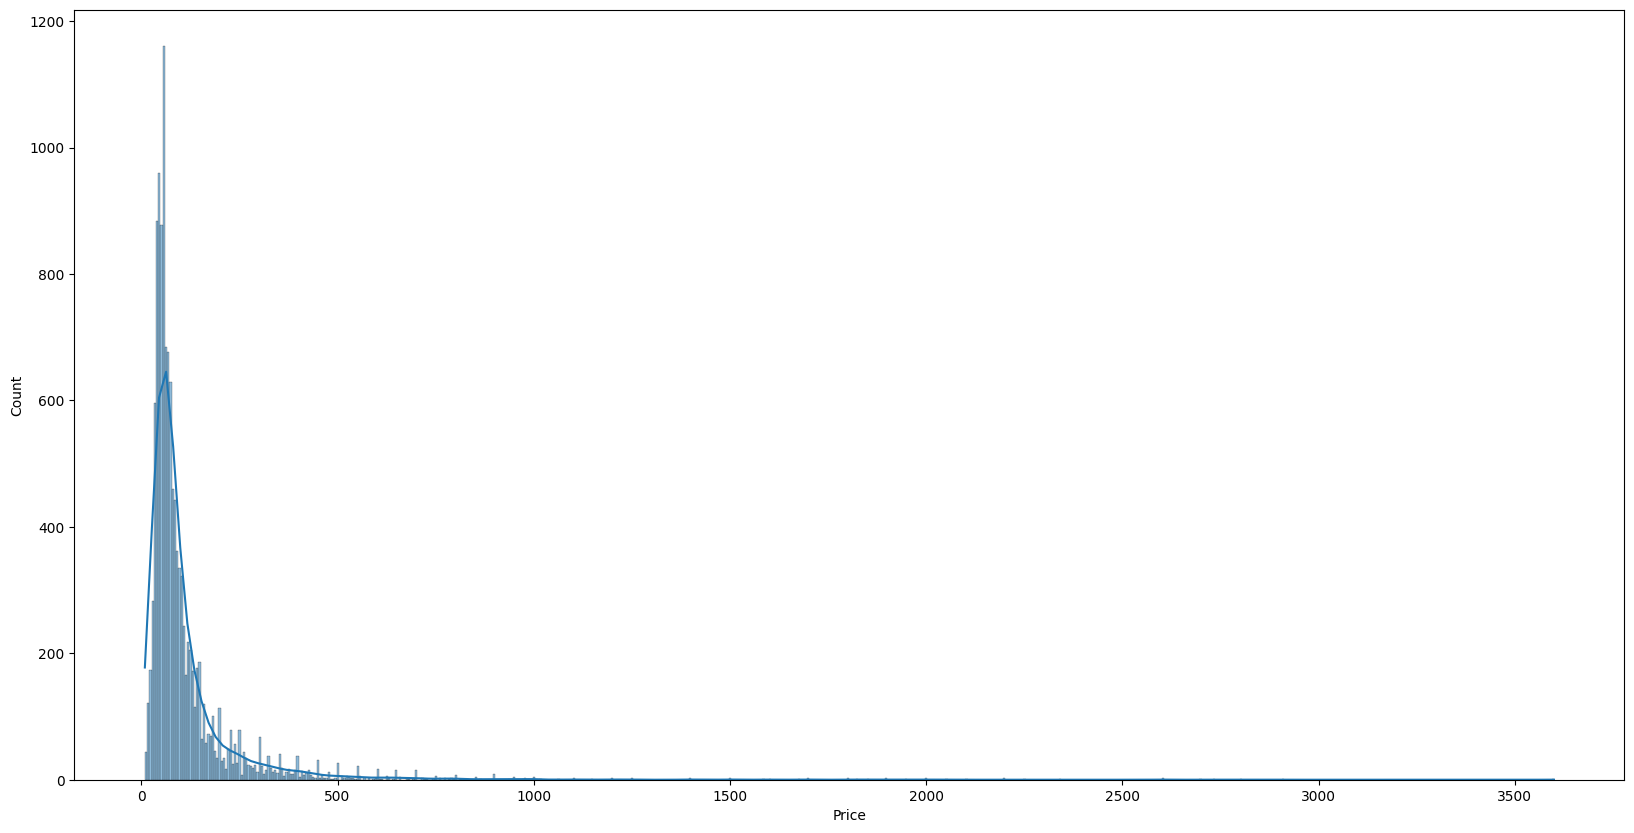

In [60]:
target=pd.Series(df6.price,name="Price")
sns.histplot(data=target,kde=True)

<Axes: xlabel='Numerical Variable', ylabel='Count'>

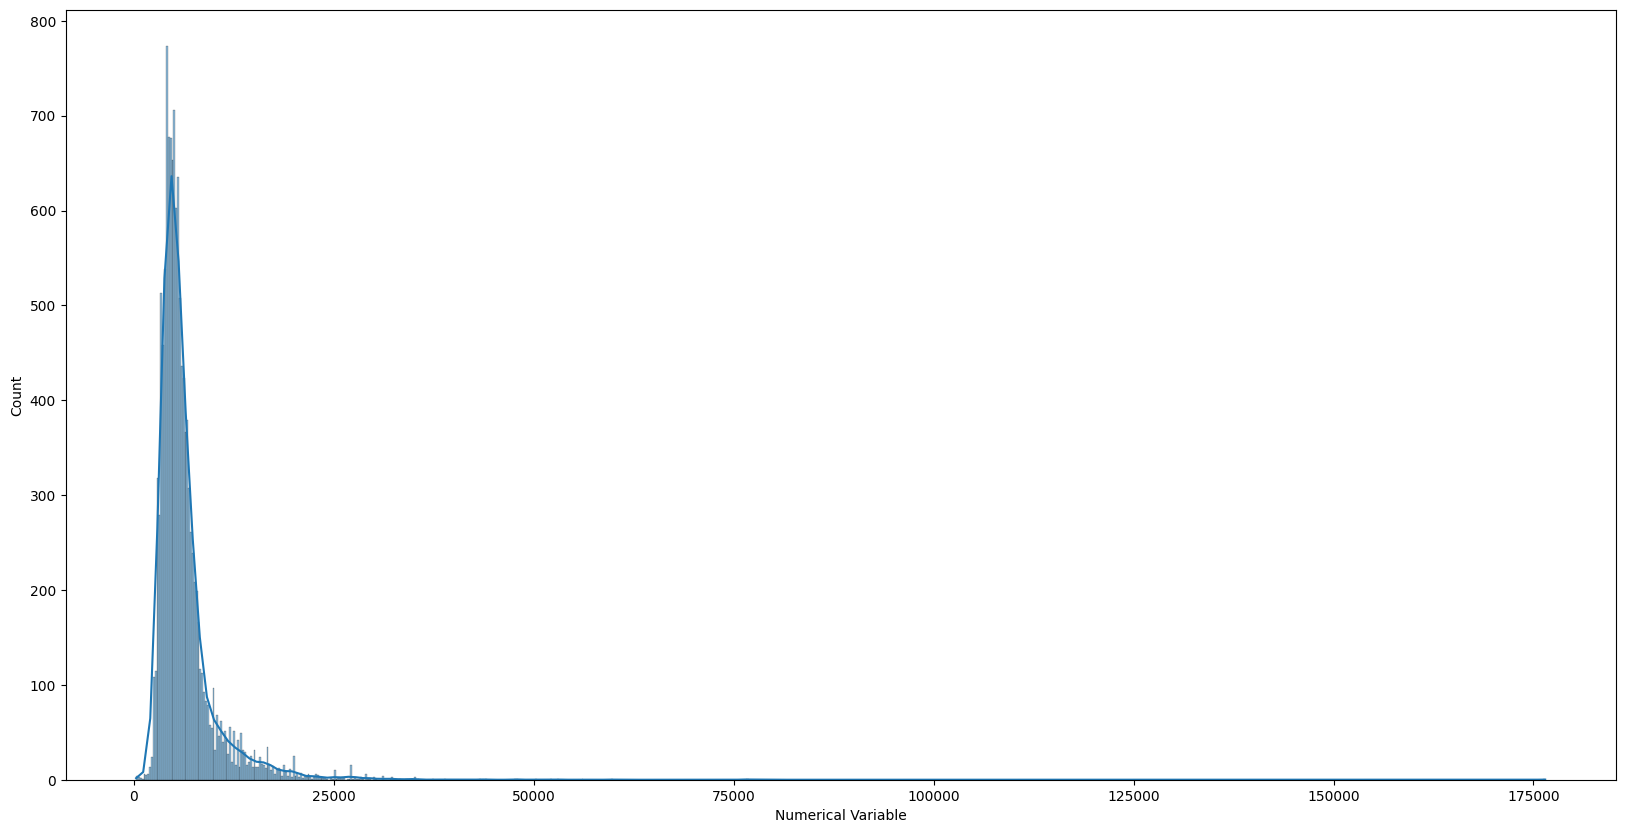

In [61]:
num_var=pd.Series(df6.price_per_sqft,name="Numerical Variable")
sns.histplot(data=num_var,kde=True)

In [62]:
# FUNCTION TO REMOVE OUTLIERS OF THE RANGE ABOVE (Q1-1.5*IQR< VALUE< Q3+1.5*IQR)

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        q1 = np.quantile(subdf.price_per_sqft,0.25)
        q3 = np.quantile(subdf.price_per_sqft,0.75)
        iqr=q3-q1
        reudced_df = subdf[(subdf.price_per_sqft>(q1-1.5*iqr)) & (subdf.price_per_sqft<(q3+1.5*iqr))]
        df_out = pd.concat([df_out,reudced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(11634, 8)

In [63]:
df7.describe()

,bath,balcony,price,BHK,total_sqft1,price_per_sqft
count,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000
mean,2.490459,1.603318,94.073160,2.592058,1534.572478,5730.390133
std,1.004393,0.789138,95.468886,0.923252,1110.543032,2495.020594
min,1.000000,0.000000,9.000000,1.000000,300.000000,267.829813
25%,2.000000,1.000000,48.000000,2.000000,1105.000000,4166.666667
50%,2.000000,2.000000,67.000000,2.000000,1290.000000,5169.203193
75%,3.000000,2.000000,103.000000,3.000000,1655.750000,6577.331016
max,16.000000,3.000000,2200.000000,16.000000,52272.000000,27083.333333


<Axes: xlabel='Numerical Variable', ylabel='Count'>

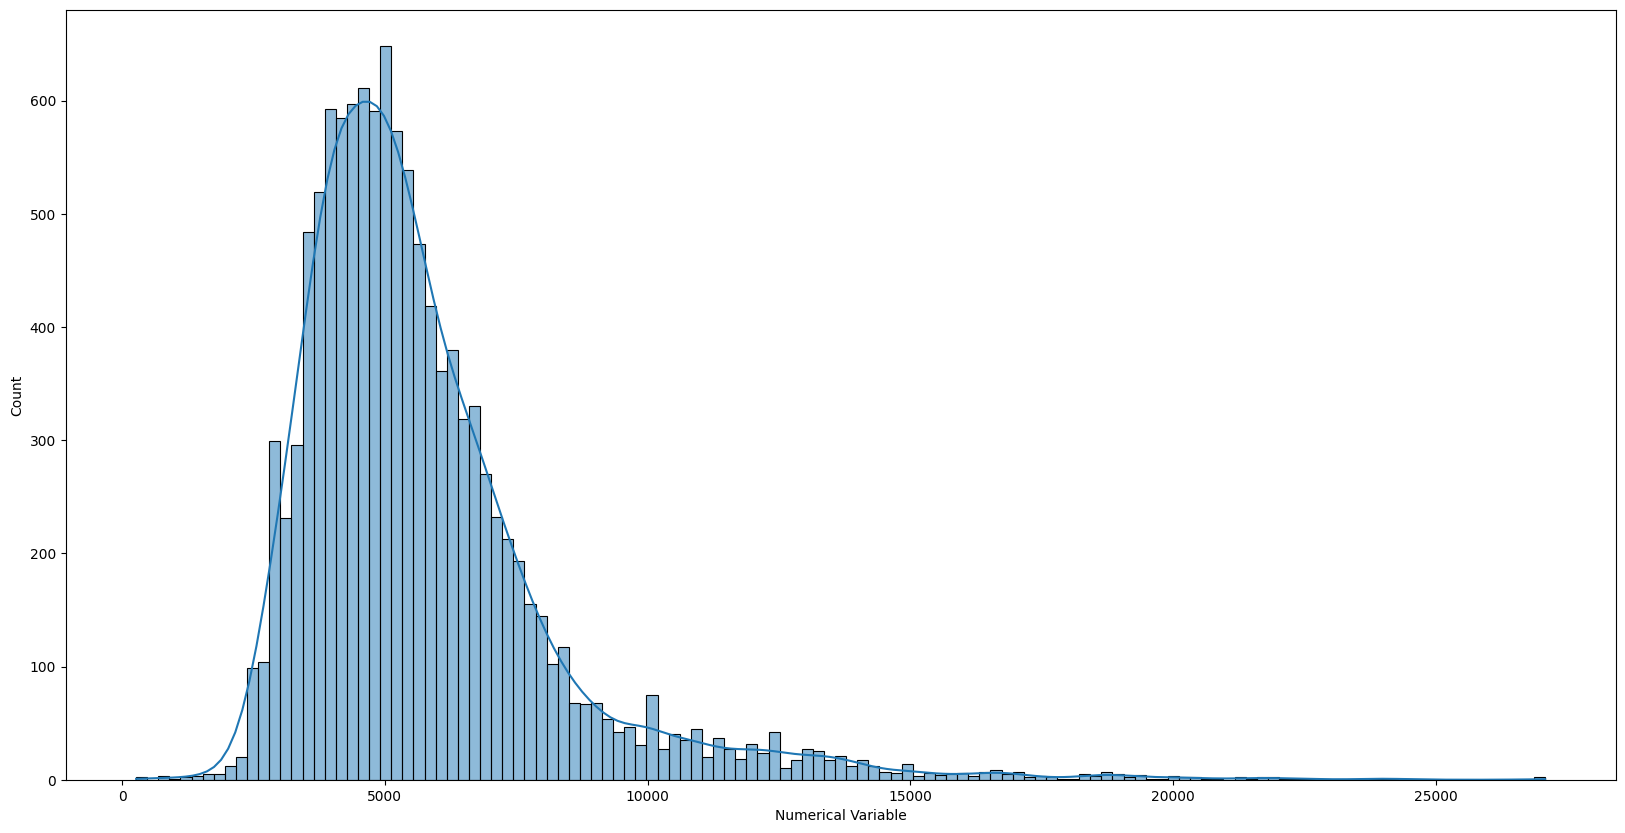

In [64]:
num_var1 = pd.Series(df7.price_per_sqft, name = "Numerical Variable")
sns.histplot(data = num_var1, kde = True)

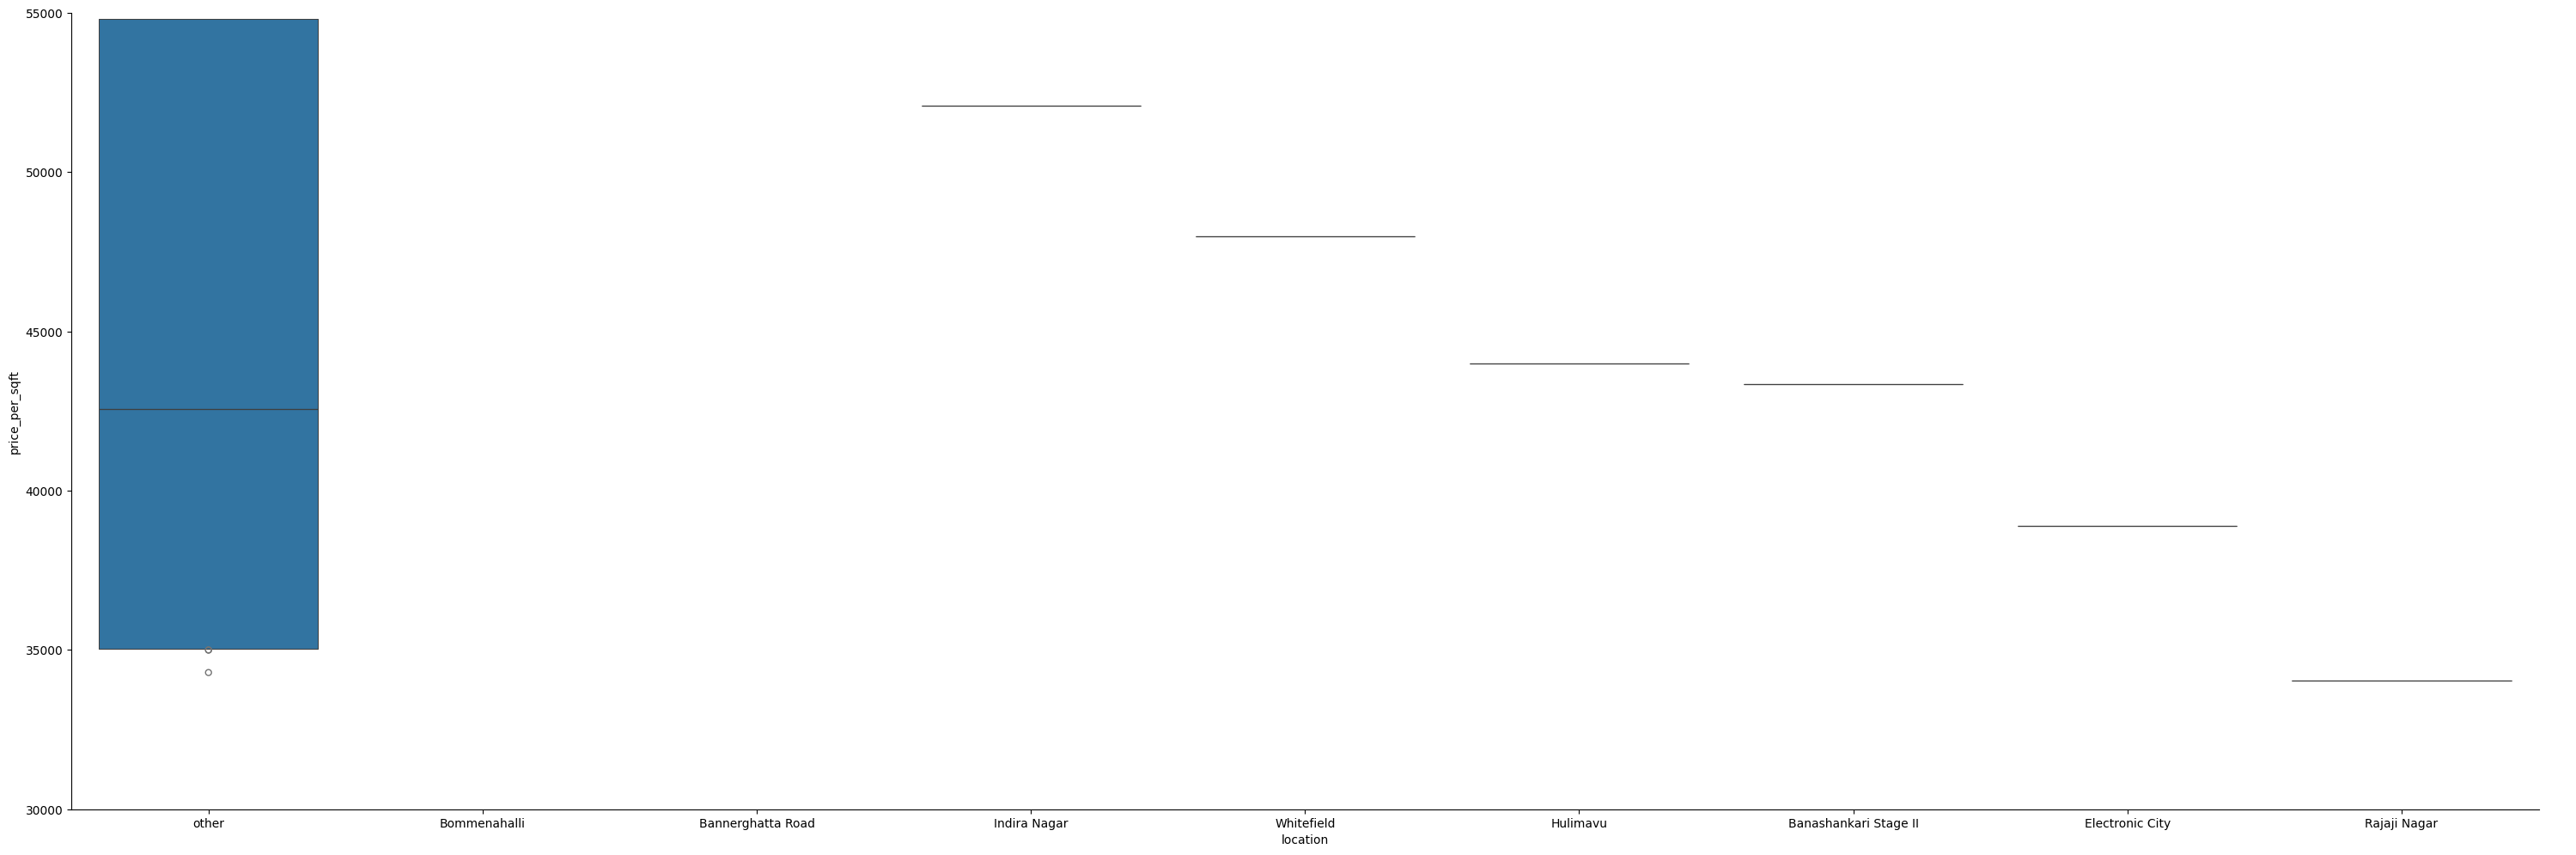

In [65]:
ax1=sns.catplot(y = "price_per_sqft", x = "location", data = df6.sort_values("price_per_sqft", ascending = False).head(20), kind="boxen", height = 10, aspect = 3,)
ax1.set(ylim=(30000, 55000))

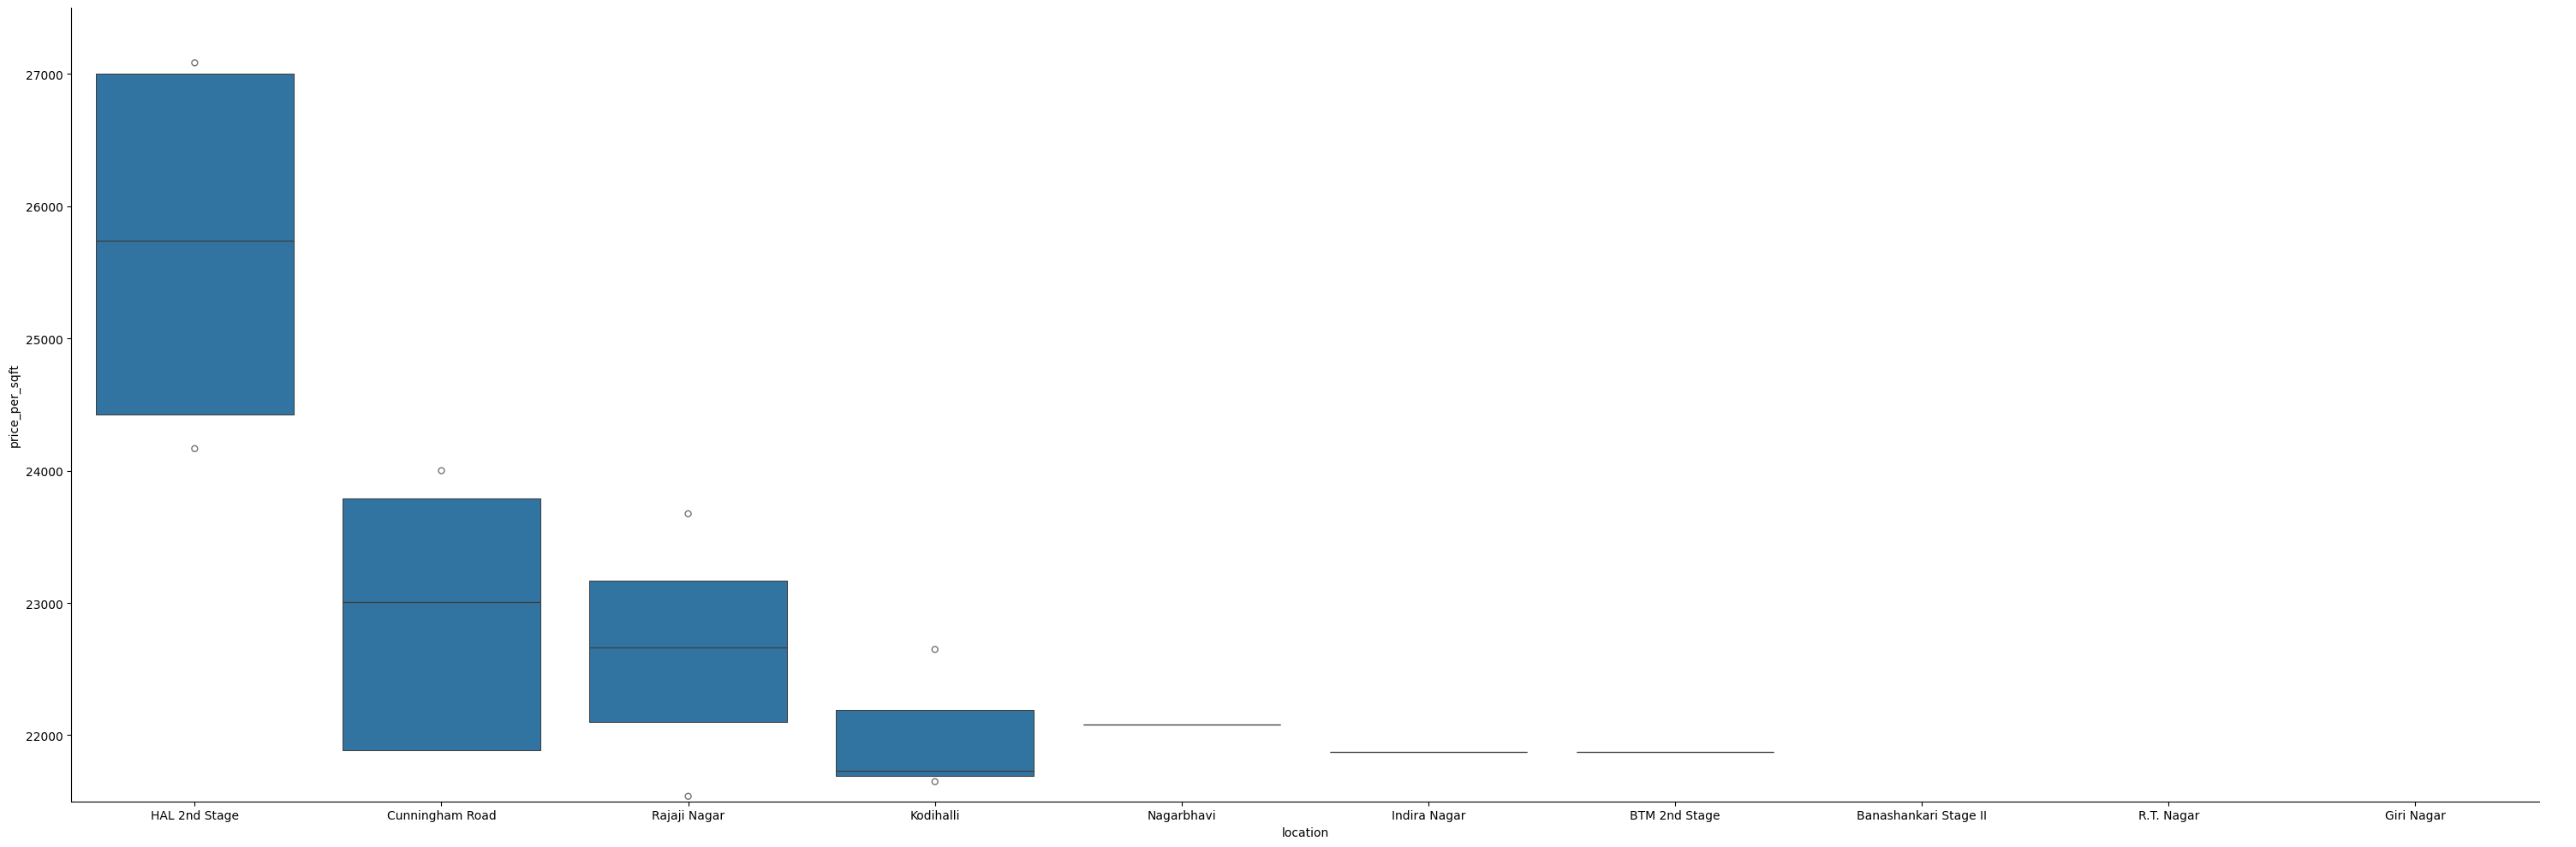

In [66]:
ax=sns.catplot(y = "price_per_sqft", x = "location", data = df7.sort_values("price_per_sqft", ascending = False).head(20), kind="boxen", height = 10, aspect = 3,)

ax.set(ylim=(21500, 27500))

In [67]:
df7.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [68]:
dftry=df7.drop(['area_type','location'],axis = 1)

<Axes: >

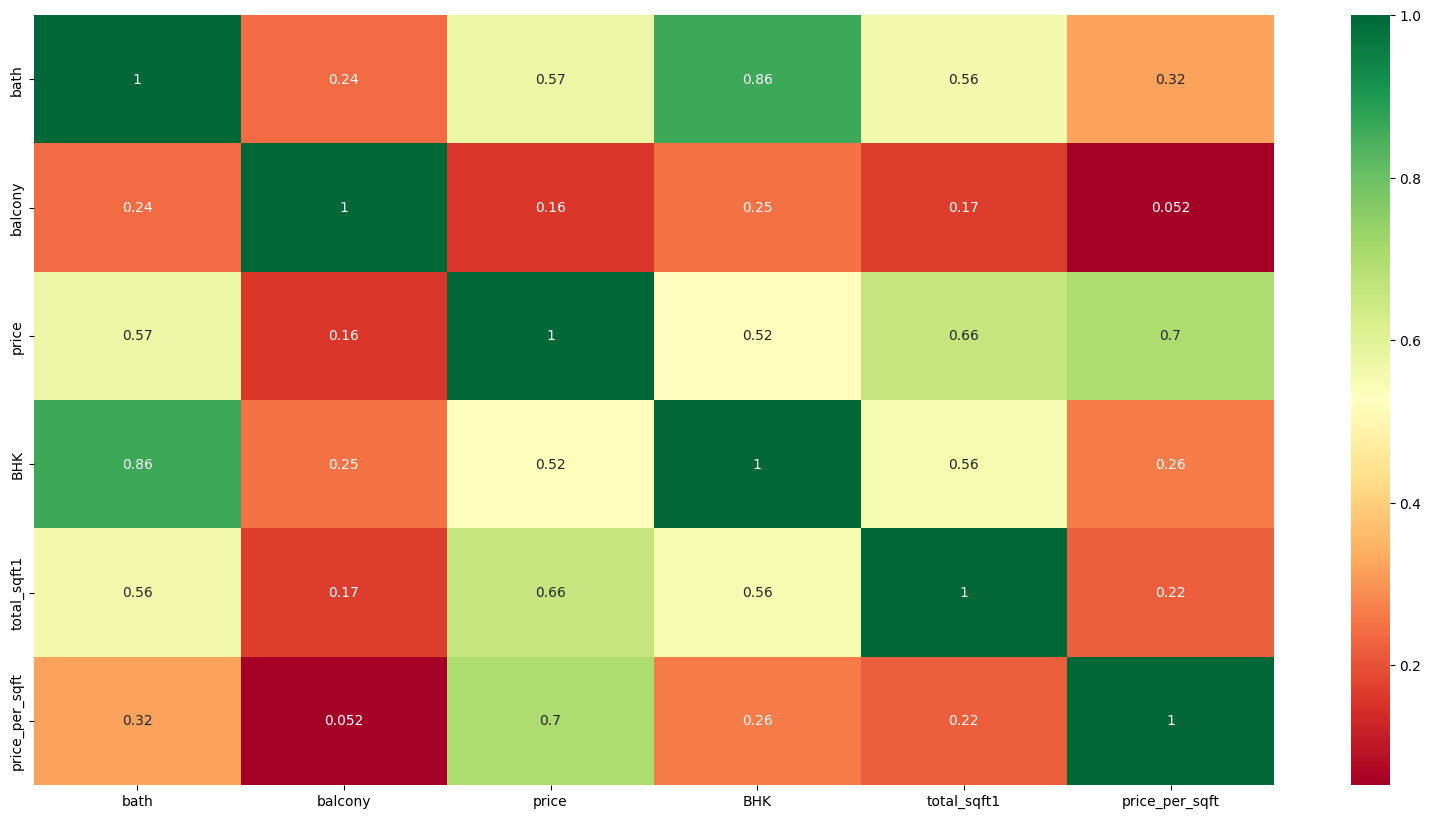

In [69]:
sns.heatmap(dftry.corr(),annot=True, cmap='RdYlGn')

In [70]:
location=df7.location.unique()
len(location)

241

In [71]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

df8.shape

(8323, 8)

Text(0, 0.5, 'Count')

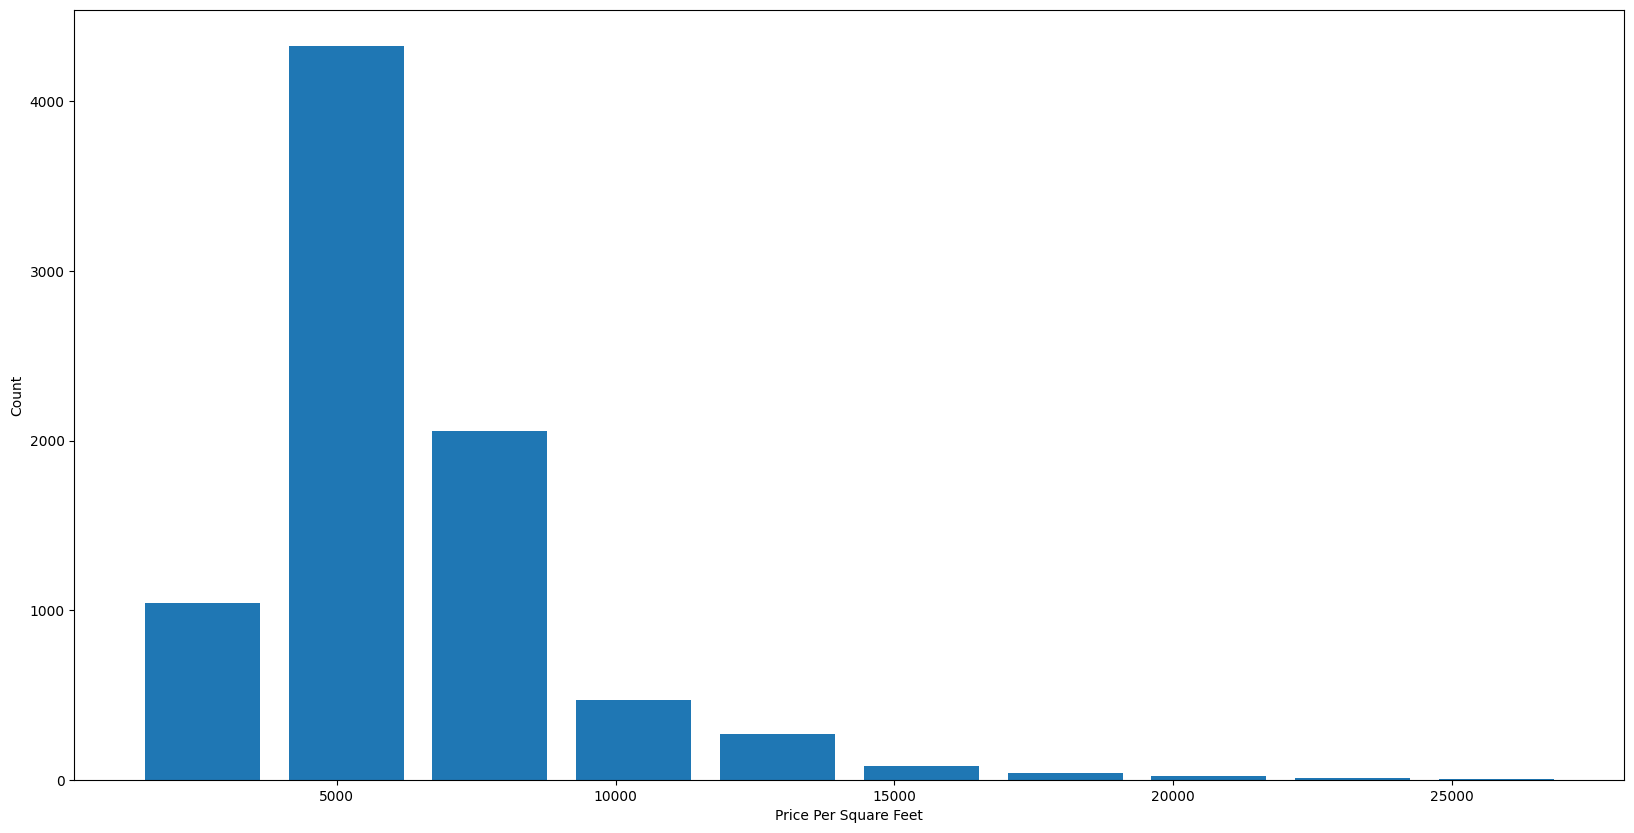

In [72]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [73]:
df10 = pd.get_dummies(df8,drop_first= True)

In [74]:
df10.head()

,bath,balcony,price,BHK,total_sqft1,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,1.0,428.0,4,2850.0,15017.543860,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.0,194.0,3,1630.0,11901.840491,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,235.0,3,1875.0,12533.333333,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2.0,450.0,4,2400.0,18750.000000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,2.0,60.0,2,1000.0,6000.000000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
df10.shape

(8323, 249)

In [76]:
X=df10.drop(['price'],axis='columns')
X.head()

,bath,balcony,BHK,total_sqft1,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,1.0,4,2850.0,15017.543860,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,2.0,3,1630.0,11901.840491,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,3,1875.0,12533.333333,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2.0,4,2400.0,18750.000000,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,2.0,2,1000.0,6000.000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
y=df10.price

In [79]:
X.shape

(8323, 248)

In [80]:
y.shape

(8323,)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [82]:
##LINEAR REGRESSION

import sklearn
import math
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_score=lr_clf.score(X_test,y_test)
lin_preds = lr_clf.predict(X_test)
lin_mse = sklearn.metrics.mean_squared_error(y_test, lin_preds)
lin_rmse = math.sqrt(lin_mse)
print(lin_rmse) ## value of RMSE
print(lr_score)

25.669239730848968
0.9079154801915987


In [83]:
lr_clf.score(X_train,y_train)

0.9038953328398122

In [84]:
X.columns

Index(['bath', 'balcony', 'BHK', 'total_sqft1', 'price_per_sqft',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=248)

In [85]:
def predict_price(location,bath,balcony,BHK,total_sqft1,price_per_sqft):
    loc_index=np.where(X.columns==location)[0][0]
    z=np.zeros(len(X.columns))
    z[0]=bath
    z[1]=balcony
    z[2]=BHK
    z[3]=total_sqft1
    z[4]=price_per_sqft
    if loc_index>=0:
        z[loc_index]=1
    return lr_clf.predict([z])[0]

In [86]:
predict_price("location_1st Phase JP Nagar",2,2,2,750,15000)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(201.08231742229367)

In [87]:
lin_preds=lr_clf.predict(X_test)
lin_preds

array([43.06433367, 40.8313261 , 91.67038804, ..., 48.03835426,
       84.58981746, 56.3748594 ])

In [88]:
y_test

,price
6546,47.39
5978,53.50
8835,88.00
3218,77.68
6583,45.00
...,...
8586,316.00
5350,300.00
4254,52.00
10956,90.00


In [89]:
list1=lr_clf.coef_.tolist()
print(len(list1))
print(list1)

248
[2.4838409907446155, -1.2016973764875356, -10.885659379140725, 0.08439109342231887, 0.020100306196715323, 2.607304188938034, -8.352070911486258, 4.913794828568616, -15.891242855463975, 12.736353887816005, -10.268021054516733, -31.511198419563556, -1.4629864260475536, -25.54919964538732, -4.032192027931606, 2.4785855002059267, 1.0802893727873144, 2.296542985522347, 15.060617382138435, -0.12510653482930678, -5.038608539510314, -17.450949906344956, 0.7421561909131391, 10.727150798293668, 33.246904409674755, 27.926678209225017, 15.342520815686601, -8.674611217163655, -2.5150924313402676, 41.17442233004856, 2.537811427886634, 2.5784453398190266, 0.17858247071147737, 11.08979608979202, -10.948333648948594, -9.101031405933615, -2.3881758442117555, 1.786254473708074, -5.570271005453762, 10.109554497459623, -31.254992021716102, 0.7951507907934721, -24.26121315902105, -7.037783472001203, -2.2409865542495417, -19.93627575249991, -4.103096187157206, -2.746204478826508, 0.3045841635947344, 11.4

In [90]:
print(lr_score)

0.9079154801915987
